<span style="font-size: 20pt; font-weight: bold; color: #0098cd;">Uso de transformers para detección de 
oportunidades en el par EUR/USD</span>

**Objetivos** 

Obtener datos en escalas de tiempo de 15 min, 60 min y 4 horas para la obtención de oportunidades en inversión para el par EUR/USD, mediante la generación de un algoritmo basado en reglas para el etiquetado de los datos, y así plantear un modelo  con arquitectura transformers para la clasificación de oportunidades de inversión. Dicho modelo será entrenado con los datos en las escalas de tiempo propuestos para así obtener rectas crecientes o decrecientes en dichas oportunidades.


### Cargar Datos desde Interactive Broker 

Obtener datos en escalas de tiempo de 15 min, 1 hora y 4 horas para obtener oportunidades de inversión en el par EUR/USD. 


In [4]:
from datetime import datetime, timedelta
import pandas as pd
import csv
import mplfinance as mpf
import numpy as np 


import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')


from datetime import datetime, timedelta
import pandas as pd
import csv
import mplfinance as mpf
import numpy as np 
import tensorflow_addons as tfa
from tensorflow import keras

import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa
from tensorflow.python.keras import backend as K


Tensorflow version: 2.8.0


In [5]:
class Vela:
    '''
    Clase para guardar los datos de cada vela
    '''

    def __init__(self, date: datetime, v_open: float, v_high:float, v_low:float, v_close:float):
        '''
        Constructor de la clase
        '''
        self._date = date
        self._v_open = v_open
        self._v_high = v_high
        self._v_low = v_low
        self._v_close = v_close
        self._vector=[]
        self._vector_con_fecha=[]
        self.ToVector()

    def Date(self):
        '''
        Método para acceder a la Fecha
        '''
        return self._date

    def Open(self):
        '''
        Método par acceder la Apertura
        '''
        return self._v_open
    
    def High(self):
        '''
        Método par acceder a Alto
        '''
        return self._v_high
    
    def Low(self):
        '''
        Método par acceder a Bajo
        '''
        return self._v_low
    
    def Close(self):
        '''
        Método par acceder al cierre
        '''
        return self._v_close
    
    def Vector(self):
        return self._vector
    
    def VectorConFecha(self):
        return self._vector_con_fecha
    
    def ToVector(self):
        (year,month,day,hour,minute,second,weekday,number,dst) =list(self._date.timetuple())
        self._vector_con_fecha = [self._v_open,self._v_high,self._v_low,self._v_close,month/12,day/31,(weekday+1)/7,hour/24,minute/60]
        self._vector = [self._v_open,self._v_high,self._v_low,self._v_close]
        
    
    def to_dict(self):
        return {
            'Date': self._date,
            'Open': self._v_open,
            'High': self._v_high,
            'Low':self._v_low,
            'Close':self._v_close,
        }
    def IsPositivos(self):
        return self._v_close-self._v_open>0
    
    

In [6]:
class Cargar:
    '''
    Clase para Cargar Datos desde csv
    '''

    def __init__(self, archivo: str, year_start:int, number_years: int):
        '''
        Constructor de la clase
        '''
        self._archivo = archivo
        self._range = range(number_years)
        self._year_start = year_start
        self._data = list()
        self.CargarDatos()
    def Data(self):
        return self._data.copy()

    def CargarDatos(self):
        '''
        Método para Cargar los datos
        '''
        for n in  self._range :
            actual = f'{self._archivo}{self._year_start+n}.csv'
            with open(actual) as csv_file:
                csv_reader = csv.reader(csv_file, delimiter=',')
                line_count = 0
                for row in csv_reader:
                    if line_count == 0:
                        line_count += 1
                    else:
                        line_count += 1
                        dateTemp = datetime.strptime(row[0], '%Y%m%d  %H:%M:%S')
                        self._data.append(Vela(date=dateTemp, v_open= float(row[1]), v_high=float(row[2]), v_low=float(row[3]), v_close=float(row[4])))

                print(f'Processed {line_count} lines. , of {actual}')
        print(len(self._data))
        
        
        

In [7]:
cargar_5_min = Cargar('EUR_USD_5mins_',2010,13)
data_5_min = cargar_5_min.Data()

Processed 73815 lines. , of EUR_USD_5mins_2010.csv
Processed 74085 lines. , of EUR_USD_5mins_2011.csv
Processed 74341 lines. , of EUR_USD_5mins_2012.csv
Processed 73789 lines. , of EUR_USD_5mins_2013.csv
Processed 73706 lines. , of EUR_USD_5mins_2014.csv
Processed 73741 lines. , of EUR_USD_5mins_2015.csv
Processed 73741 lines. , of EUR_USD_5mins_2016.csv
Processed 73741 lines. , of EUR_USD_5mins_2017.csv
Processed 73829 lines. , of EUR_USD_5mins_2018.csv
Processed 73713 lines. , of EUR_USD_5mins_2019.csv
Processed 73729 lines. , of EUR_USD_5mins_2020.csv
Processed 74033 lines. , of EUR_USD_5mins_2021.csv
Processed 74074 lines. , of EUR_USD_5mins_2022.csv
960324


In [8]:
cargar_15_min = Cargar('EUR_USD_15mins_',2010,13)
data_15_min = cargar_15_min.Data()

Processed 24606 lines. , of EUR_USD_15mins_2010.csv
Processed 24699 lines. , of EUR_USD_15mins_2011.csv
Processed 24789 lines. , of EUR_USD_15mins_2012.csv
Processed 24598 lines. , of EUR_USD_15mins_2013.csv
Processed 24570 lines. , of EUR_USD_15mins_2014.csv
Processed 24581 lines. , of EUR_USD_15mins_2015.csv
Processed 24581 lines. , of EUR_USD_15mins_2016.csv
Processed 24581 lines. , of EUR_USD_15mins_2017.csv
Processed 24611 lines. , of EUR_USD_15mins_2018.csv
Processed 24572 lines. , of EUR_USD_15mins_2019.csv
Processed 24577 lines. , of EUR_USD_15mins_2020.csv
Processed 24679 lines. , of EUR_USD_15mins_2021.csv
Processed 24692 lines. , of EUR_USD_15mins_2022.csv
320123


In [9]:
cargar_1_hora = Cargar('EUR_USD_1_hour_',2022,1)
data_1_hora = cargar_1_hora.Data()

Processed 80822 lines. , of EUR_USD_1_hour_2022.csv
80821


In [10]:
cargar_4_hora = Cargar('EUR_USD_4_hour_',2022,1)
data_4_hora = cargar_4_hora.Data()

Processed 23576 lines. , of EUR_USD_4_hour_2022.csv
23575


In [8]:
df_sin_procesar= pd.DataFrame.from_records([s.to_dict() for s in data_15_min])
df_sin_procesar.tail()

,Date,Open,High,Low,Close
320118,2021-12-31 15:45:00,1.138490,1.138515,1.137575,1.137590
320119,2021-12-31 16:00:00,1.137590,1.137920,1.137590,1.137910
320120,2021-12-31 16:15:00,1.137910,1.137935,1.137620,1.137895
320121,2021-12-31 16:30:00,1.137895,1.137930,1.137775,1.137815
320122,2021-12-31 16:45:00,1.137815,1.138255,1.137290,1.137700


In [9]:
df_1_hora_sin_procesar= pd.DataFrame.from_records([s.to_dict() for s in data_1_hora])
df_1_hora_sin_procesar.head()

,Date,Open,High,Low,Close
0,2009-01-04 17:15:00,1.388300,1.390300,1.387850,1.388650
1,2009-01-04 18:00:00,1.388650,1.396075,1.388650,1.395850
2,2009-01-04 19:00:00,1.395850,1.396350,1.392850,1.394525
3,2009-01-04 20:00:00,1.394525,1.395200,1.392125,1.392850
4,2009-01-04 21:00:00,1.392850,1.392900,1.384325,1.385800


In [10]:
df_4_hora_sin_procesar= pd.DataFrame.from_records([s.to_dict() for s in data_4_hora])
df_4_hora_sin_procesar.head()

,Date,Open,High,Low,Close
0,2009-01-04 17:15:00,1.388300,1.396075,1.387850,1.395850
1,2009-01-04 19:00:00,1.395850,1.396350,1.384325,1.388100
2,2009-01-04 23:00:00,1.388100,1.394300,1.387150,1.392825
3,2009-01-05 03:00:00,1.392825,1.393050,1.362450,1.364275
4,2009-01-05 07:00:00,1.364275,1.365125,1.355350,1.363550


In [11]:
step = 40000
date=(df_sin_procesar['Date'].loc[::step])
xticklabels=[s.strftime("%Y-%m-%d") for s in date]

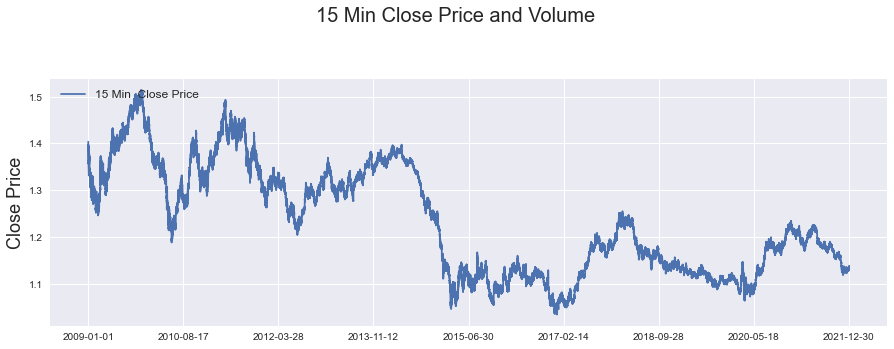

In [12]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("15 Min Close Price and Volume", fontsize=20)
ax1 = fig.add_subplot(211)
ax1.plot(df_sin_procesar['Close'], label='15 Min  Close Price')
ax1.set_xticks(range(0, df_sin_procesar.shape[0], step))
ax1.set_xticklabels(xticklabels)
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

In [13]:
class Normalizar:
    def __init__(self, df, porcentaje_test:int):
        self._df = df
        self._porcentaje_test=porcentaje_test
        
        self._train_data = None
        self._test_data = None

        self._train_data_with_date  = None
        self._test_data_with_date  = None
        
        self._df_proce = None
        self.min=None
        self.max=None
            
        
        self._Calcular()
       
        
        
    def Df(self):
        return self._df_proce.copy()
        
    def Data(self):
        return self._train_data.copy() ,self._test_data.copy()
    
    def DataWithDate(self):
        return self._train_data_with_date.copy() ,self._test_data_with_date.copy()
        
    def _Calcular(self):
        '''Cambio a porcentaje'''
        df_temp = self._df.copy()
        df_temp['Open'] = df_temp['Open'].pct_change() 
        df_temp['High'] = df_temp['High'].pct_change() 
        df_temp['Low'] = df_temp['Low'].pct_change() 
        df_temp['Close'] = df_temp['Close'].pct_change()
        
        '''Promedio 10 ultimas velas'''
        df_temp[['Open', 'High', 'Low', 'Close']] = df_temp[['Open', 'High', 'Low', 'Close']].rolling(10).mean() 
        
        '''Eliminar filas con NaN'''        
        df_temp.dropna(how='any', axis=0, inplace=True) 
        
        '''Calculo de inicio de test'''
        start_test = df_temp.index.values[-int(0.01*self._porcentaje_test*len(df_temp))]
        
        '''Calculo de minimo y maximo solo con las datos de trading'''
        min_df = min(df_temp[(df_temp.index < start_test)][['Open', 'High', 'Low', 'Close']].min(axis=0))
        max_df = max(df_temp[(df_temp.index < start_test)][['Open', 'High', 'Low', 'Close']].max(axis=0))
        self.min=min_df
        self.max=max_df
        
        '''Normalizacion'''
        df_temp['Open'] = (df_temp['Open'] - min_df) / (max_df - min_df)
        df_temp['High'] = (df_temp['High'] - min_df) / (max_df - min_df)
        df_temp['Low'] = (df_temp['Low'] - min_df) / (max_df - min_df)
        df_temp['Close'] = (df_temp['Close'] - min_df) / (max_df - min_df)
        
        self._df_proce = df_temp
        
        '''División de data set '''
        df_train = df_temp[(df_temp.index < start_test)]  
        df_test = df_temp[(df_temp.index >= start_test)]

        df_train_with_date = df_temp[(df_temp.index < start_test)]  
        df_test_with_date  = df_temp[(df_temp.index >= start_test)]

        '''Eliminar columna de fecha  '''
        df_train.drop(columns=['Date'], inplace=True)
        df_test.drop(columns=['Date'], inplace=True)


        self._train_data = df_train.values
        self._test_data = df_test.values

        self._train_data_with_date  = df_train_with_date.values
        self._test_data_with_date  = df_test_with_date.values

#         print('Datos de Entrenamiento shape: ',self._train_data.shape)
#         print('Datos de Test: ',self._test_data.shape)
    
    

In [14]:
normalized_15_min = Normalizar(df_sin_procesar,20)
normalized_1_hora = Normalizar(df_1_hora_sin_procesar,20)
normalized_4_hora = Normalizar(df_4_hora_sin_procesar,20)

In [35]:
class Procesamiento:
    '''
    Clase para obtener las matrices de probabilidad HMM Bigrama a partir de un corpus
    '''

    def __init__(self, normalized_15_min,seq_len_15_min:int , normalized_1_hora=None, seq_1_hora=None, normalized_4_hora=None,
                 seq_4_hora=None, offset=None):
        
        self._normalized_15_min = normalized_15_min
        self._normalized_1_hora = normalized_1_hora
        self._normalized_4_hora = normalized_4_hora
        self._seq_len_15_min = seq_len_15_min
        self._seq_1_hora = seq_1_hora
        self._seq_4_hora = seq_4_hora
        self._offset = offset
        
        self._train_data, self._test_data = self._normalized_15_min.Data()
        self._train_data_with_date, self._test_data_with_date = self._normalized_15_min.DataWithDate()
        self._df_1_hora = None
        self._df_4_hora = None
        self._X_train = None 
        self._y_train = None 
        self._X_test = None
        self._y_test = None
        if(self._normalized_1_hora != None):
            self._df_1_hora = self._normalized_1_hora.Df()
        
        if(self._normalized_4_hora!=None):
            self._df_4_hora = self._normalized_4_hora.Df()
            
    def Proce15Min(self):
        X_train, y_train = [], []
        seq_len =self._seq_len_15_min
        for i in range(seq_len, len(self._train_data)):
            X_train.append(self._train_data[i-seq_len:i])
            y_train.append(self._train_data[:, 3][i]) 
        self._X_train, self._y_train = np.array(X_train), np.array(y_train)

        
        X_test, y_test = [], []
        for i in range(seq_len, len(self._test_data)):
            X_test.append(self._test_data[i-seq_len:i])
            y_test.append(self._test_data[:, 3][i])    
        self._X_test, self._y_test = np.array(X_test), np.array(y_test)
        
        print('Training set shape', self._X_train.shape, self._y_train.shape)
        print('Testing set shape' ,self._X_test.shape, self._y_test.shape)
        
        return self._X_train, self._y_train,self._X_test, self._y_test   
    
    def Proce1Hora(self):
        seq_len = self._seq_len_15_min
        inicio = seq_len_15_min +self._seq_1_hora*4
        
        X_train, y_train = [], []
        
        for i in range(inicio, len(self._train_data)):
            
            in_1hora = self._df_1_hora.values[np.where(self._df_1_hora['Date'] <  self._train_data_with_date[i][0])]
            data_temp=in_1hora[-self._seq_1_hora:]
            data_temp=np.delete(data_temp, 0, 1)
            data_total = np.concatenate((data_temp, self._train_data[i-seq_len:i]), axis=0)
            X_train.append(data_total) 
            y_train.append(self._train_data[:, 3][i])
        self._X_train, self._y_train = np.array(X_train), np.array(y_train)
        print('Training set shape', self._X_train.shape, self._y_train.shape)
        
        X_test, y_test = [], []
        for i in range(inicio, len(self._test_data)):
            in_1hora = self._df_1_hora.loc[lambda df: df['Date'] < self._test_data_with_date[i][0], :]
            data_temp=in_1hora[-self._seq_1_hora:]
            data_temp=np.delete(data_temp.values, 0, 1)
            data_total = np.concatenate((data_temp, self._test_data[i-seq_len:i]), axis=0)
            X_test.append(data_total)
            y_test.append(self._test_data[:, 3][i])    
        self._X_test, self._y_test = np.array(X_test), np.array(y_test)
        
        
        print('Testing set shape' ,self._X_test.shape, self._y_test.shape)
        
        return self._X_train.copy(), self._y_train.copy(),self._X_test.copy(), self._y_test.copy()
    
    
    def Proce4Hora(self):
        seq_len = self._seq_len_15_min
        inicio = self._seq_len_15_min +self._seq_1_hora*4 + self._seq_4_hora*16 +self._offset
        X_train, y_train = [], []
        for i in range(inicio, len(self._train_data)):
            in_1hora = self._df_1_hora.loc[lambda df: df['Date'] < self._train_data_with_date[i][0], :]
            data_temp=in_1hora[-self._seq_1_hora:]
            date_1_hora= data_temp[0:1].values[0][0]
            in_4_hora = self._df_4_hora.loc[lambda df: df['Date'] < date_1_hora, :]
            data_temp_4_ho=in_1hora[-self._seq_4_hora:]
            data_temp=np.delete(data_temp.values, 0, 1)
            data_temp_4_ho=np.delete(data_temp_4_ho.values, 0, 1)
            data_total = np.concatenate((data_temp_4_ho,data_temp, self._train_data[i-seq_len:i]), axis=0)
            X_train.append(data_total) 
            y_train.append(self._train_data[:, 3][i])
        self._X_train, self._y_train = np.array(X_train), np.array(y_train)
        print('Training set shape', self._X_train.shape, self._y_train.shape)
        
        X_test, y_test = [], []
        
        for i in range(inicio, len(self._test_data)):
            in_1hora = self._df_1_hora.loc[lambda df: df['Date'] < self._test_data_with_date[i][0], :]
            data_temp=in_1hora[-self._seq_1_hora:]
            date_1_hora= data_temp[0:1].values[0][0]
            in_4_hora = self._df_4_hora.loc[lambda df: df['Date'] < date_1_hora, :]
            data_temp_4_ho=in_1hora[-self._seq_4_hora:]
            data_temp=np.delete(data_temp.values, 0, 1)
            data_temp_4_ho=np.delete(data_temp_4_ho.values, 0, 1)
            data_total = np.concatenate((data_temp_4_ho,data_temp, self.test_data[i-seq_len:i]), axis=0)
            X_test.append(data_total)
            y_test.append(self._test_data[:, 3][i])    
        self._X_test, self._y_test = np.array(X_test), np.array(y_test)
        
        
        print('Testing set shape' ,self._X_test.shape, self._y_test.shape)
        
        return self._X_train.copy(), self._y_train.copy(),self._X_test.copy(), self._y_test.copy()



In [36]:
seq_len_15_min =300
seq_4_hora = 0
seq_1_hora = 0
procesamiento_15min= Procesamiento(normalized_15_min, seq_len_15_min)
X_train_15Min, y_train_15Min, X_test_15Min, y_test_15Min = procesamiento_15min.Proce15Min()

Training set shape (255791, 300, 4) (255791,)
Testing set shape (63722, 300, 4) (63722,)


In [16]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [17]:
class Patches(layers.Layer):
    def __init__(self, patch_size,**kwargs):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, serie):
        batch_size = tf.shape(serie)[0]
        patches = tf.image.extract_patches(
            images=serie,
            sizes=[1, 1, self.patch_size, 1],
            strides=[1, 1, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            "patch_size": self.patch_size,
        })
        return config

In [18]:
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, patch_flated,**kwargs):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.patch_flated =patch_flated
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=self.patch_flated
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = patch + self.position_embedding(positions)
        return encoded
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            "num_patches": self.num_patches,
            "patch_flated":self.patch_flated,
        })
        return config

In [19]:
seq_len = 300
patch_size = 10  
num_patches = int(seq_len / patch_size)
patch_flated = patch_size*4
input_shape =(seq_len,4)
num_heads = 4
transformer_units = [
    patch_flated * 2,
    patch_flated,
]  
transformer_layers = 8
mlp_head_units = [2048, 1024] 
print('num_patches',num_patches)

num_patches 30


In [20]:
def Transformers_Forex():   
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    inputs_tensor=tf.convert_to_tensor(inputs)
    inputs_exten=tf.expand_dims(inputs_tensor, axis=1)
    
    # Create patches.
    patches = Patches(patch_size)(inputs_exten)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, patch_flated)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=patch_flated, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    
    xf = layers.Dense(64, activation='relu')(features)
    xf = Dropout(0.1)(xf)
    out = Dense(1, activation='linear')(xf)
    # Classify outputs.
#     logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=out)
    model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mape'])
    return model

In [21]:
class RunModel:
    '''
    Clase para obtener las matrices de probabilidad HMM Bigrama a partir de un corpus
    '''

    def __init__(self, model,name,batch_size, num_epochs, X_train, y_train, **kwargs):

        self.checkpoint_filepath = f'./tmp/{name}.hdf5'
        self.history =None
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.batch_size = batch_size
        self.num_epochs = num_epochs


        self.checkpoint_callback = keras.callbacks.ModelCheckpoint(
                self.checkpoint_filepath,
                monitor="val_mape",
                save_best_only=True,
                verbose=1)
        
    def LoadModel(self):
        return  tf.keras.models.load_model(self.checkpoint_filepath,
                                   custom_objects={'mlp': mlp, 
                                                   'Patches': Patches,
                                                   'Transformers_Forex': Transformers_Forex,
                                                   'PatchEncoder': PatchEncoder})
    def run(self):
        self.history = self.model.fit(
                x=np.asarray(self.X_train).astype('float32'),
                y=self.y_train,
                batch_size=self.batch_size,
                epochs=self.num_epochs,
                validation_split=0.1,
                callbacks=[self.checkpoint_callback],)

In [33]:
model_15Min = Transformers_Forex()
model_15Min.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 300, 4)]     0           []                               
                                                                                                  
 tf.convert_to_tensor_1 (TFOpLa  (None, 300, 4)      0           ['input_2[0][0]']                
 mbda)                                                                                            
                                                                                                  
 tf.expand_dims_1 (TFOpLambda)  (None, 1, 300, 4)    0           ['tf.convert_to_tensor_1[0][0]'] 
                                                                                                  
 patches_2 (Patches)            (None, None, 40)     0           ['tf.expand_dims_1[0][0]'] 

 layer_normalization_23 (LayerN  (None, 30, 40)      80          ['add_21[0][0]']                 
 ormalization)                                                                                    
                                                                                                  
 multi_head_attention_11 (Multi  (None, 30, 40)      26120       ['layer_normalization_23[0][0]', 
 HeadAttention)                                                   'layer_normalization_23[0][0]'] 
                                                                                                  
 add_22 (Add)                   (None, 30, 40)       0           ['multi_head_attention_11[0][0]',
                                                                  'add_21[0][0]']                 
                                                                                                  
 layer_normalization_24 (LayerN  (None, 30, 40)      80          ['add_22[0][0]']                 
 ormalizat

 dropout_40 (Dropout)           (None, 30, 80)       0           ['dense_32[0][0]']               
                                                                                                  
 dense_33 (Dense)               (None, 30, 40)       3240        ['dropout_40[0][0]']             
                                                                                                  
 dropout_41 (Dropout)           (None, 30, 40)       0           ['dense_33[0][0]']               
                                                                                                  
 add_29 (Add)                   (None, 30, 40)       0           ['dropout_41[0][0]',             
                                                                  'add_28[0][0]']                 
                                                                                                  
 layer_normalization_31 (LayerN  (None, 30, 40)      80          ['add_29[0][0]']                 
 ormalizat

In [37]:
name='15min'
batch_size=256
num_epochs=10

run_15min= RunModel(model_15Min, name,batch_size,num_epochs,X_train_15Min,y_train_15Min)



In [38]:
# run_15min.run()
model15min= run_15min.LoadModel()

In [39]:
test_pred_15Min = model15min.predict(np.asarray(X_test_15Min).astype('float32'), verbose=1)
test_eval_15Min = model15min.evaluate(np.asarray(X_test_15Min).astype('float32'), y_test_15Min, verbose=1)

print('Evaluación ')
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval_15Min[0], test_eval_15Min[1], test_eval_15Min[2]))

1992/1992 [==============================] - 62s 31ms/step - loss: 1.1908e-04 - mae: 0.0075 - mape: 1.6893
Evaluación 
Test Data - Loss: 0.0001, MAE: 0.0075, MAPE: 1.6893


In [40]:
print(test_pred_15Min.shape)
print(y_test_15Min.shape)

(63722, 1)
(63722,)


In [61]:
class Graficar:
    
    def __init__(self, name:str, y_test, test_pred, **kwargs):
        self.name = name
        self.y_test = y_test
        self.test_pred = test_pred
        fig = plt.figure(figsize=(15,20))
        st = fig.suptitle(f"{name}", fontsize=22)
        st.set_y(0.92)
        ax11 = fig.add_subplot(311)
        ax11.plot(y_test, label=f'{name} Closing Returns')
        ax11.plot(test_pred, linewidth=3, label=f'Predicted {name} Closing Returns',alpha=0.5)
        ax11.set_title("Test Data", fontsize=18)
        ax11.set_xlabel('Date')
        ax11.set_ylabel(f'{name} Closing Returns')
        ax11.legend(loc="best", fontsize=12)
    
    def Zoom(self,inicio, fin):
        fig = plt.figure(figsize=(15,20))
        st = fig.suptitle(f"{self.name} Zoom {inicio}-{fin}", fontsize=22)
        st.set_y(0.92)
        ax11 = fig.add_subplot(311)
        ax11.plot(range(inicio,fin),self.y_test[inicio:fin], label=f'{self.name} Closing Returns')
        ax11.plot(range(inicio,fin),self.test_pred[inicio:fin], linewidth=3, label=f'Predicted {self.name} Closing Returns',
                  alpha=0.5)
        ax11.set_title("Test Data", fontsize=18)
        ax11.set_xlabel('Date')
        ax11.set_ylabel(f'{self.name} Closing Returns')
        ax11.legend(loc="best", fontsize=12)
        
        

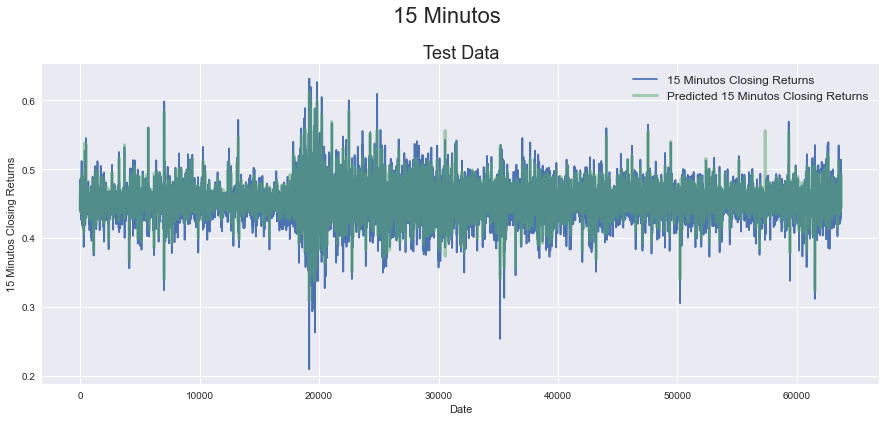

In [62]:
name= '15 Minutos'
gaf_15_min = Graficar(name,y_test_15Min,test_pred_15Min)

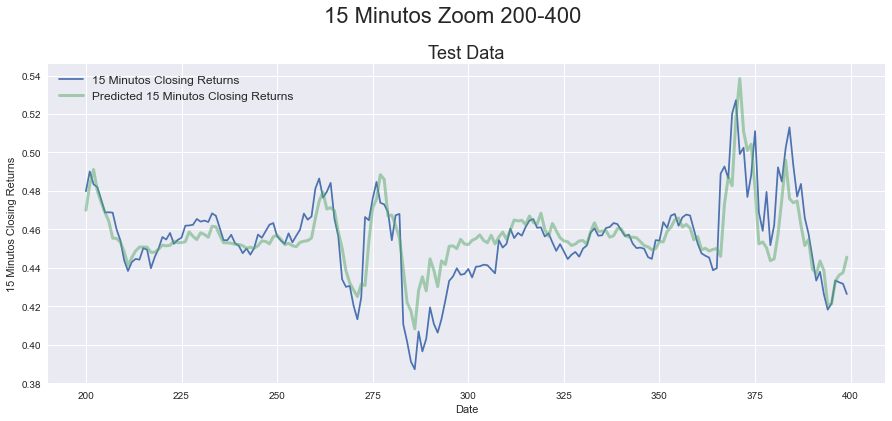

In [69]:
gaf_15_min.Zoom(200,400)

In [50]:
seq_len_15_min = 200
seq_1_hora=100
seq_len = seq_len_15_min
inicio = seq_len_15_min +seq_1_hora*4


train_data, test_data = normalized_15_min.Data()
train_data_with_date, test_data_with_date = normalized_15_min.DataWithDate()
df_1_hora = normalized_1_hora.Df()



X_train, y_train = [], []
for i in range(inicio, len(train_data)):
    in_1hora = df_1_hora.loc[lambda df: df['Date'] < train_data_with_date[i][0], :]
    data_temp=in_1hora[-seq_1_hora:]
    data_temp=np.delete(data_temp.values, 0, 1)
    data_total = np.concatenate((data_temp, train_data[i-seq_len:i]), axis=0)
    X_train.append(data_total) 
    y_train.append(train_data[:, 3][i]) 
X_train_1_Hora, y_train_1_Hora = np.array(X_train), np.array(y_train)
print('Training set shape', X_train_1_Hora.shape, y_train_1_Hora.shape)

Training set shape (255491, 300, 4) (255491,)


In [51]:
X_test, y_test = [], []
for i in range(inicio, len(test_data)):
    in_1hora = df_1_hora.loc[lambda df: df['Date'] < test_data_with_date[i][0], :]
    data_temp=in_1hora[-seq_1_hora:]
    data_temp=np.delete(data_temp.values, 0, 1)
    data_total = np.concatenate((data_temp, test_data[i-seq_len:i]), axis=0)
    X_test.append(data_total)
    y_test.append(test_data[:, 3][i])    
X_test_1_Hora, y_test_1_Hora = np.array(X_test), np.array(y_test)

print('Testing set shape' ,X_test_1_Hora.shape, y_test_1_Hora.shape)

Testing set shape (63422, 300, 4) (63422,)


In [2]:
model_1_hora = Transformers_Forex()
model_1_hora.summary()

NameError: name 'Transformers_Forex' is not defined

In [3]:
name='1hora'
batch_size=256
num_epochs=10


run_1_Hora= RunModel(model_1_hora, name,batch_size,num_epochs,X_train_1_Hora,y_train_1_Hora)


NameError: name 'RunModel' is not defined

In [60]:
# run_1_Hora.run()
model1hora= run_1_Hora.LoadModel()

In [56]:
test_pred_1hora = model1hora.predict(np.asarray(X_test_1_Hora).astype('float32'), verbose=1)
test_eval_1hora = model1hora.evaluate(np.asarray(X_test_1_Hora).astype('float32'), y_test_1_Hora, verbose=1)

print('Evaluación ')
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval_1hora[0], test_eval_1hora[1], test_eval_1hora[2]))

1982/1982 [==============================] - 61s 30ms/step - loss: 1.0733e-04 - mae: 0.0065 - mape: 1.4590
Evaluación 
Test Data - Loss: 0.0001, MAE: 0.0065, MAPE: 1.4590


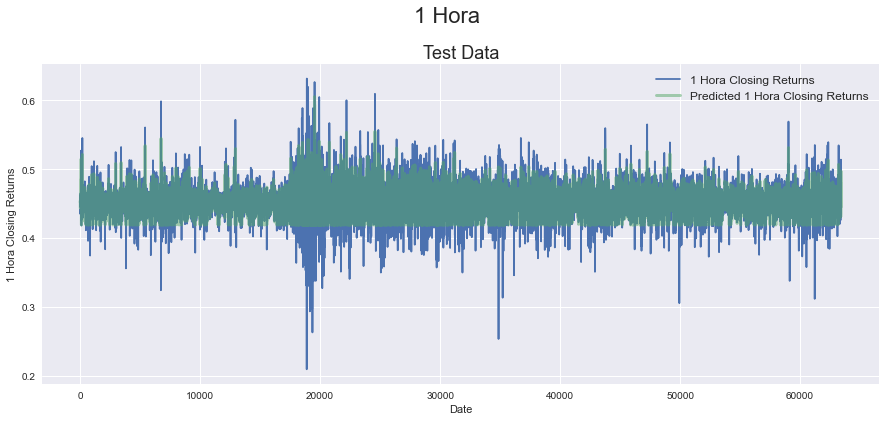

In [64]:
name= '1 Hora'
gaf_1_Hora = Graficar(name,y_test_1_Hora,test_pred_1hora)

In [1]:
gaf_1_Hora.Zoom(18000,20000)

NameError: name 'gaf_1_Hora' is not defined

In [23]:
offset_inicial=600
seq_len_15_min = 100
seq_1_hora=100
seq_4_hora=100
seq_len = seq_len_15_min
inicio = seq_len_15_min +seq_1_hora*4 + seq_4_hora*16 +offset_inicial

train_data, test_data = normalized_15_min.Data()
train_data_with_date, test_data_with_date = normalized_15_min.DataWithDate()
df_1_hora = normalized_1_hora.Df()
df_4_hora = normalized_4_hora.Df()


X_train, y_train = [], []
for i in range(inicio, len(train_data)):
    in_1hora = df_1_hora.loc[lambda df: df['Date'] < train_data_with_date[i][0], :]
    data_temp=in_1hora[-seq_1_hora:]
    date_1_hora= data_temp[0:1].values[0][0]
    in_4_hora = df_4_hora.loc[lambda df: df['Date'] < date_1_hora, :]
    data_temp_4_ho=in_1hora[-seq_4_hora:]
    data_temp=np.delete(data_temp.values, 0, 1)
    data_temp_4_ho=np.delete(data_temp_4_ho.values, 0, 1)
    data_total = np.concatenate((data_temp_4_ho,data_temp, train_data[i-seq_len:i]), axis=0)
    X_train.append(data_total) # Chunks of training data with a length of 128 df-rows
    y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train_4_horas, y_train_4_horas = np.array(X_train), np.array(y_train)
print('Training set shape', X_train_4_horas.shape, y_train_4_horas.shape)

Training set shape (253391, 300, 4) (253391,)


In [24]:
X_test, y_test = [], []
for i in range(inicio, len(test_data)):
    in_1hora = df_1_hora.loc[lambda df: df['Date'] < test_data_with_date[i][0], :]
    data_temp=in_1hora[-seq_1_hora:]
    date_1_hora= data_temp[0:1].values[0][0]
    in_4_hora = df_4_hora.loc[lambda df: df['Date'] < date_1_hora, :]
    data_temp_4_ho=in_1hora[-seq_4_hora:]
    data_temp=np.delete(data_temp.values, 0, 1)
    data_temp_4_ho=np.delete(data_temp_4_ho.values, 0, 1)
    data_total = np.concatenate((data_temp_4_ho,data_temp, test_data[i-seq_len:i]), axis=0)
    
    X_test.append(data_total)
    y_test.append(test_data[:, 3][i])    
X_test_4_horas, y_test_4_horas = np.array(X_test), np.array(y_test)

print('Training set shape', X_train_4_horas.shape, y_train_4_horas.shape )
print('Testing set shape' ,X_test_4_horas.shape, y_test_4_horas.shape)

Training set shape (253391, 300, 4) (253391,)
Testing set shape (61322, 300, 4) (61322,)


In [25]:
model_4_hora = Transformers_Forex()
model_4_hora.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 4)]     0           []                               
                                                                                                  
 tf.convert_to_tensor (TFOpLamb  (None, 300, 4)      0           ['input_1[0][0]']                
 da)                                                                                              
                                                                                                  
 tf.expand_dims (TFOpLambda)    (None, 1, 300, 4)    0           ['tf.convert_to_tensor[0][0]']   
                                                                                                  
 patches (Patches)              (None, None, 40)     0           ['tf.expand_dims[0][0]']     

 layer_normalization_6 (LayerNo  (None, 30, 40)      80          ['add_5[0][0]']                  
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 30, 40)      26120       ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                                  
 add_6 (Add)                    (None, 30, 40)       0           ['multi_head_attention_3[0][0]', 
                                                                  'add_5[0][0]']                  
                                                                                                  
 layer_normalization_7 (LayerNo  (None, 30, 40)      80          ['add_6[0][0]']                  
 rmalizati

 dropout_12 (Dropout)           (None, 30, 80)       0           ['dense_12[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 30, 40)       3240        ['dropout_12[0][0]']             
                                                                                                  
 dropout_13 (Dropout)           (None, 30, 40)       0           ['dense_13[0][0]']               
                                                                                                  
 add_13 (Add)                   (None, 30, 40)       0           ['dropout_13[0][0]',             
                                                                  'add_12[0][0]']                 
                                                                                                  
 layer_normalization_14 (LayerN  (None, 30, 40)      80          ['add_13[0][0]']                 
 ormalizat

In [26]:
name='4hora'
batch_size=256
num_epochs=10

run_4_Hora= RunModel(model_4_hora, name,batch_size,num_epochs,X_train_4_horas,y_train_4_horas)


In [27]:
run_4_Hora.run()
model4hora= run_4_Hora.LoadModel()

Epoch 1/10
891/891 [==============================] - ETA: 0s - loss: 0.0707 - mae: 0.0817 - mape: 18.1306
Epoch 1: val_mape improved from inf to 22.05646, saving model to ./tmp\4hora.hdf5
891/891 [==============================] - 105s 107ms/step - loss: 0.0707 - mae: 0.0817 - mape: 18.1306 - val_loss: 0.0104 - val_mae: 0.1005 - val_mape: 22.0565
Epoch 2/10
891/891 [==============================] - ETA: 0s - loss: 0.0049 - mae: 0.0545 - mape: 12.1066
Epoch 2: val_mape improved from 22.05646 to 11.94123, saving model to ./tmp\4hora.hdf5
891/891 [==============================] - 101s 113ms/step - loss: 0.0049 - mae: 0.0545 - mape: 12.1066 - val_loss: 0.0032 - val_mae: 0.0545 - val_mape: 11.9412
Epoch 3/10
891/891 [==============================] - ETA: 0s - loss: 0.0030 - mae: 0.0422 - mape: 9.3793
Epoch 3: val_mape improved from 11.94123 to 6.39853, saving model to ./tmp\4hora.hdf5
891/891 [==============================] - 97s 108ms/step - loss: 0.0030 - mae: 0.0422 - mape: 9.3793 -

In [30]:
test_pred_4hora = model4hora.predict(np.asarray(X_test_4_horas).astype('float32'), verbose=1)
test_eval_4hora = model4hora.evaluate(np.asarray(X_test_4_horas).astype('float32'), y_test_4_horas, verbose=1)

print('Evaluación ')
print('Test Data - Loss: {:.4f}, MAE: {:.4f}, MAPE: {:.4f}'.format(test_eval_4hora[0], test_eval_4hora[1], test_eval_4hora[2]))

1917/1917 [==============================] - 58s 30ms/step - loss: 8.3778e-05 - mae: 0.0062 - mape: 1.3676
Evaluación 
Test Data - Loss: 0.0001, MAE: 0.0062, MAPE: 1.3676


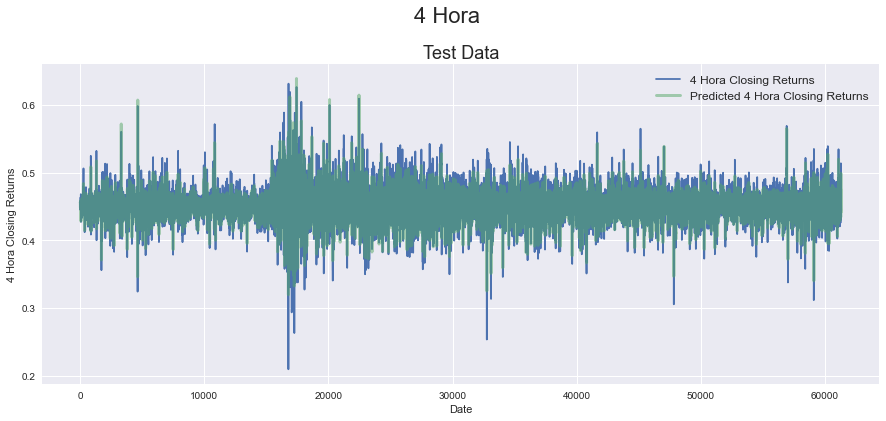

In [66]:
name= '4 Hora'
gaf_4_Hora = Graficar(name,y_test_4_horas,test_pred_4hora)

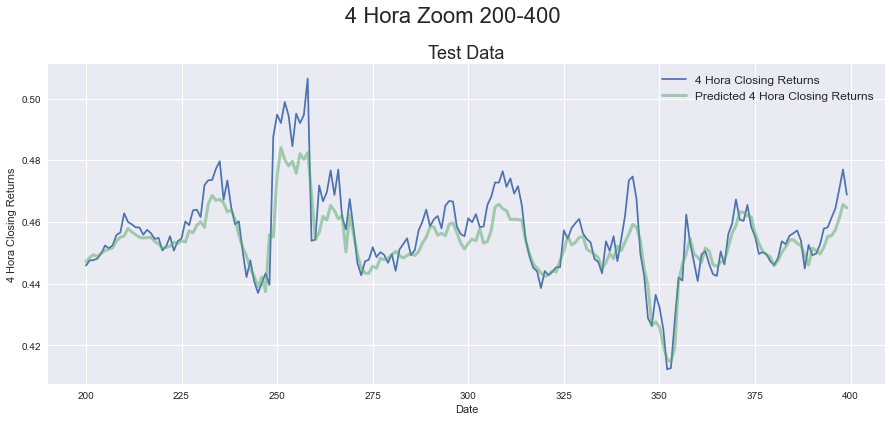

In [67]:
gaf_4_Hora.Zoom(200,400)

In [70]:
prueba_train_data, prueba_test_data = normalized_15_min.Data()

In [83]:
i=len(prueba_train_data)-1
seq_len_t =5
prueba_train_data[i-seq_len_t:i]


array([[0.46762857, 0.46197634, 0.46074217, 0.4532987 ],
       [0.4532987 , 0.45219549, 0.4539866 , 0.45205836],
       [0.45205836, 0.44950905, 0.44992083, 0.4547451 ],
       [0.4547451 , 0.45254011, 0.45240226, 0.45426259],
       [0.45426259, 0.44930335, 0.45233348, 0.44847666]])

In [84]:
prueba_train_data[:,:][i]

array([0.44847666, 0.44524077, 0.44627184, 0.44654844])